## Quanto tempo para terminar o jogo?

## Qual a probabilidade dessa situação atual do jogo ser real? E não ser fabricada manualmente (= roubada)

In [149]:
import numpy as np

board = [0] * 52
board[4] = 1
board[8] = 1
board[12] = 1
board[16] = 1
board[19] = 1
board[25] = 1
board[30] = 1
board[33] = 1
board[36] = 1
board[41] = 1
board[44] = 1
board[47] = 1
board = np.array(board)

In [150]:
# o que aconteceria se as cartas fossem balanceadas? -6,-5,-4,-3,-2,-1,1,2,3,4,5,6

cards = [-6, -5, -4, -3, -2, -1, 1, 2, 3, 3, 4, 6]

In [151]:
# regra assumida: quando você pega uma carta e usa, ela volta pra pilha, EMBARALHADA

In [152]:
DICE_FACES = 4

In [153]:
np.random.seed(43354)

class Game:
  def __init__(self, players, board, player_time):
    self.players = players
    self.board = board
    # current_player pode ser calculado atraves do turno
    self.current_player = 0
    self.turn = 1
    self.player_position = np.array([0, 0])
    self.player_time = player_time
    self.current_time = 0

  def next_turn(self):

    dice = np.random.choice(DICE_FACES) + 1
    
    self.player_position[self.current_player] += dice
    self.current_time += self.player_time[self.current_player]

    if self.player_position[self.current_player] >= len(self.board) - 1:
      # print(f"winner {self.current_player}")
      return False

    self.current_player = (self.current_player + 1) % self.players
    self.turn += 1
    return True

  def print_status(self):
    print(f"{self.turn} :: {self.player_position}")



In [154]:
# o tempo em funcao do numero de jogadores?

def simulate(player_time):
  game = Game(2, board, player_time=player_time)
  while game.next_turn():
    pass
  return [game.current_time / 60.0, game.current_player, game.turn, game.player_position]
  # game.print_status()
simulate([5,30])

[11.083333333333334, 1, 38, array([42, 51])]

In [155]:
from tqdm import tqdm


In [156]:
import pandas as pd

np.random.seed(43278)
results = [simulate([5,30]) for i in tqdm(range(10000))]
results = pd.DataFrame(results, columns=["time", "player", "turn", "positions"])
results.head()



  0%|          | 0/10000 [00:00<?, ?it/s]

  3%|▎         | 329/10000 [00:00<00:02, 3285.65it/s]

  7%|▋         | 696/10000 [00:00<00:02, 3390.24it/s]

 11%|█         | 1064/10000 [00:00<00:02, 3469.86it/s]

 14%|█▍        | 1421/10000 [00:00<00:02, 3499.04it/s]

 17%|█▋        | 1735/10000 [00:00<00:02, 3381.32it/s]

 21%|██        | 2075/10000 [00:00<00:02, 3383.81it/s]

 25%|██▍       | 2458/10000 [00:00<00:02, 3505.84it/s]

 28%|██▊       | 2795/10000 [00:00<00:02, 3462.10it/s]

 32%|███▏      | 3154/10000 [00:00<00:01, 3497.32it/s]

 35%|███▌      | 3524/10000 [00:01<00:01, 3555.38it/s]

 39%|███▉      | 3902/10000 [00:01<00:01, 3618.39it/s]

 43%|████▎     | 4265/10000 [00:01<00:01, 3611.05it/s]

 47%|████▋     | 4655/10000 [00:01<00:01, 3692.02it/s]

 50%|█████     | 5035/10000 [00:01<00:01, 3722.37it/s]

 54%|█████▍    | 5406/10000 [00:01<00:01, 3593.79it/s]

 58%|█████▊    | 5766/10000 [00:01<00:01, 3476.96it/s]

 62%|██████▏   | 6155/10000 [00:01<00:01, 3590.91it/s]

 65%|

,time,player,turn,positions
0,11.666667,1,40,"[43, 54]"
1,11.083333,1,38,"[48, 51]"
2,9.416667,0,33,"[52, 35]"
3,10.583333,0,37,"[51, 46]"
4,10.583333,0,37,"[51, 43]"


In [157]:
results.mean()

time                    11.1873
player                   0.4179
turn                    38.7721
positions    [49.2707, 47.6236]
dtype: object

## O jogador inicial tem vantagem!

## Em média vão ser 38.7 jogadas e 11 minutos. Mas não existe 38.7 jogadas!

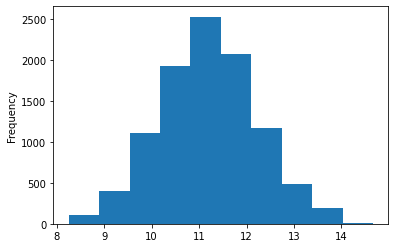

In [158]:
results['time'].plot(kind='hist')

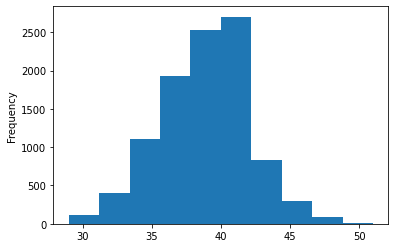

In [159]:
results['turn'].plot(kind='hist')

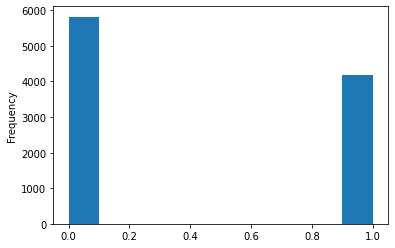

In [160]:
results['player'].plot(kind='hist')

In [161]:
import matplotlib.pyplot as plt

def run_simulation_for(player_time):
  np.random.seed(574983)
  results = [simulate(player_time) for i in tqdm(range(10000))]
  results = pd.DataFrame(results, columns=["time", "player", "turn", "positions"])
  results['player'].plot(kind='hist')
  plt.show()
  results['turn'].plot(kind='hist')
  plt.show()
  results['time'].plot(kind='hist')
  plt.show()
  display(results.describe())
  return results



  0%|          | 0/10000 [00:00<?, ?it/s]

  3%|▎         | 343/10000 [00:00<00:02, 3428.37it/s]

  7%|▋         | 669/10000 [00:00<00:02, 3373.74it/s]

 10%|█         | 1033/10000 [00:00<00:02, 3449.02it/s]

 14%|█▍        | 1405/10000 [00:00<00:02, 3524.57it/s]

 18%|█▊        | 1782/10000 [00:00<00:02, 3592.28it/s]

 22%|██▏       | 2158/10000 [00:00<00:02, 3640.91it/s]

 25%|██▌       | 2539/10000 [00:00<00:02, 3689.74it/s]

 29%|██▉       | 2906/10000 [00:00<00:01, 3682.84it/s]

 33%|███▎      | 3272/10000 [00:00<00:01, 3675.58it/s]

 36%|███▋      | 3640/10000 [00:01<00:01, 3674.99it/s]

 40%|███▉      | 3999/10000 [00:01<00:01, 3620.87it/s]

 44%|████▎     | 4355/10000 [00:01<00:01, 3509.49it/s]

 47%|████▋     | 4703/10000 [00:01<00:01, 3465.54it/s]

 51%|█████     | 5066/10000 [00:01<00:01, 3513.23it/s]

 54%|█████▍    | 5416/10000 [00:01<00:01, 3457.08it/s]

 58%|█████▊    | 5762/10000 [00:01<00:01, 3455.80it/s]

 61%|██████    | 6113/10000 [00:01<00:01, 3470.70it/s]

 65%|

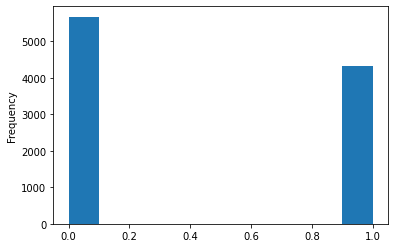

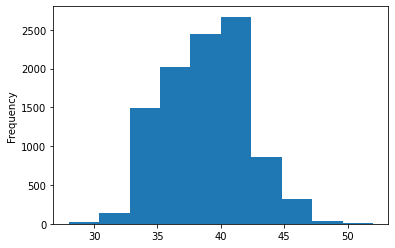

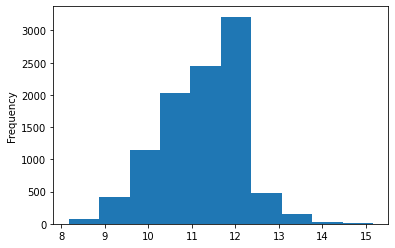

,time,player,turn
count,10000.000000,10000.000000,10000.000000
mean,11.176942,0.432500,38.726300
std,0.938455,0.495448,3.172412
min,8.166667,0.000000,28.000000
25%,10.583333,0.000000,37.000000
50%,11.166667,0.000000,39.000000
75%,11.750000,1.000000,41.000000
max,15.166667,1.000000,52.000000


,time,player,turn,positions
0,12.916667,0,45,"[53, 47]"
1,10.583333,0,37,"[51, 50]"
2,10.583333,0,37,"[51, 43]"
3,12.833333,1,44,"[50, 51]"
4,13.416667,1,46,"[49, 51]"
...,...,...,...,...
9995,11.166667,0,39,"[52, 45]"
9996,11.166667,0,39,"[53, 40]"
9997,12.250000,1,42,"[45, 51]"
9998,10.000000,0,35,"[51, 38]"


In [162]:
run_simulation_for([5,30])



  0%|          | 0/10000 [00:00<?, ?it/s]

  3%|▎         | 338/10000 [00:00<00:02, 3368.61it/s]

  7%|▋         | 706/10000 [00:00<00:02, 3455.63it/s]

 11%|█         | 1076/10000 [00:00<00:02, 3522.93it/s]

 15%|█▍        | 1456/10000 [00:00<00:02, 3600.17it/s]

 18%|█▊        | 1839/10000 [00:00<00:02, 3665.08it/s]

 22%|██▏       | 2210/10000 [00:00<00:02, 3678.20it/s]

 26%|██▌       | 2567/10000 [00:00<00:02, 3643.53it/s]

 30%|██▉       | 2958/10000 [00:00<00:01, 3719.43it/s]

 33%|███▎      | 3333/10000 [00:00<00:01, 3727.53it/s]

 37%|███▋      | 3702/10000 [00:01<00:01, 3715.16it/s]

 41%|████      | 4079/10000 [00:01<00:01, 3730.52it/s]

 45%|████▍     | 4453/10000 [00:01<00:01, 3731.26it/s]

 48%|████▊     | 4822/10000 [00:01<00:01, 3615.94it/s]

 52%|█████▏    | 5208/10000 [00:01<00:01, 3683.81it/s]

 56%|█████▌    | 5576/10000 [00:01<00:01, 3680.00it/s]

 59%|█████▉    | 5948/10000 [00:01<00:01, 3689.06it/s]

 63%|██████▎   | 6317/10000 [00:01<00:01, 3593.04it/s]

 67%|

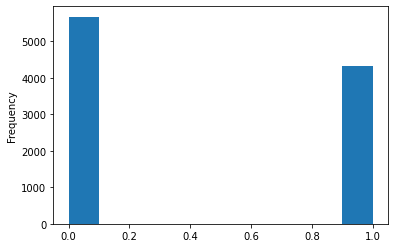

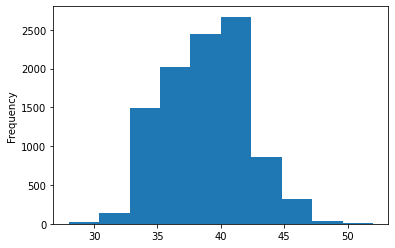

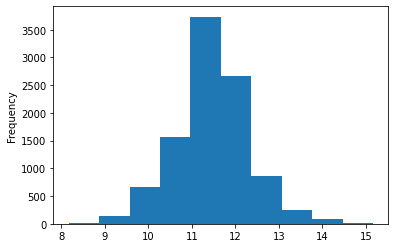

,time,player,turn
count,10000.000000,10000.000000,10000.000000
mean,11.413400,0.432500,38.726300
std,0.923537,0.495448,3.172412
min,8.166667,0.000000,28.000000
25%,11.000000,0.000000,37.000000
50%,11.583333,0.000000,39.000000
75%,12.166667,1.000000,41.000000
max,15.166667,1.000000,52.000000


,time,player,turn,positions
0,13.333333,0,45,"[53, 47]"
1,11.000000,0,37,"[51, 50]"
2,11.000000,0,37,"[51, 43]"
3,12.833333,1,44,"[50, 51]"
4,13.416667,1,46,"[49, 51]"
...,...,...,...,...
9995,11.583333,0,39,"[52, 45]"
9996,11.583333,0,39,"[53, 40]"
9997,12.250000,1,42,"[45, 51]"
9998,10.416667,0,35,"[51, 38]"


In [163]:
run_simulation_for([30,5])